<a href="https://colab.research.google.com/github/Sadrasadeghi/Analysis-of-Pumped-Hydro-Energy-Storage-in-Great-Britain-s-Electrical-Network/blob/main/Generation_of_Power_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we attempted to analyze the generation of major power types in UK over the past years

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('espeni.csv')
df.head()

,ELEXM_SETTLEMENT_DATE,ELEXM_SETTLEMENT_PERIOD,ELEXM_utc,ELEXM_localtime,ELEXM_ROWFLAG,NGEM_ROWFLAG,POWER_ESPENI_MW,POWER_ELEXM_CCGT_MW,POWER_ELEXM_OIL_MW,POWER_ELEXM_COAL_MW,...,POWER_ELEXM_BIOMASS_POSTCALC_MW,POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW,POWER_NGEM_EMBEDDED_WIND_GENERATION_MW,POWER_NGEM_BRITNED_FLOW_MW,POWER_NGEM_EAST_WEST_FLOW_MW,POWER_NGEM_MOYLE_FLOW_MW,POWER_NGEM_NEMO_FLOW_MW,POWER_NGEM_IFA_FLOW_MW,POWER_NGEM_IFA2_FLOW_MW,POWER_NGEM_NSL_FLOW_MW
0,05/11/2008,43,2008-11-05T21:00:00+00:00,2008-11-05T21:00:00+00:00,1,1,44020,16468,0,19525,...,0,0,129,0,0,-59,NaN,1355,NaN,NaN
1,05/11/2008,44,2008-11-05T21:30:00+00:00,2008-11-05T21:30:00+00:00,1,1,42169,15240,0,18892,...,0,0,71,0,0,-59,NaN,1386,NaN,NaN
2,05/11/2008,45,2008-11-05T22:00:00+00:00,2008-11-05T22:00:00+00:00,1,1,40228,14402,0,18154,...,0,0,71,0,0,-59,NaN,1361,NaN,NaN
3,05/11/2008,46,2008-11-05T22:30:00+00:00,2008-11-05T22:30:00+00:00,1,1,38349,13170,0,17843,...,0,0,40,0,0,-59,NaN,1361,NaN,NaN
4,05/11/2008,47,2008-11-05T23:00:00+00:00,2008-11-05T23:00:00+00:00,1,1,37640,12520,0,17339,...,0,0,40,0,0,-59,NaN,1841,NaN,NaN


In [ ]:
df['ELEXM_utc'] = pd.to_datetime(df['ELEXM_utc'], utc=True)
df['YEAR'] = df['ELEXM_utc'].dt.year
df_yearly = df.groupby('YEAR').sum()

# remove data for 2008 and 2022 as both sets are incomplete
df_yearly.drop(index=[2008, 2022], axis=0, inplace=True)

<ipython-input-12-c5b3fa182744>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_yearly = df.groupby('YEAR').sum()


<function matplotlib.pyplot.show(close=None, block=None)>

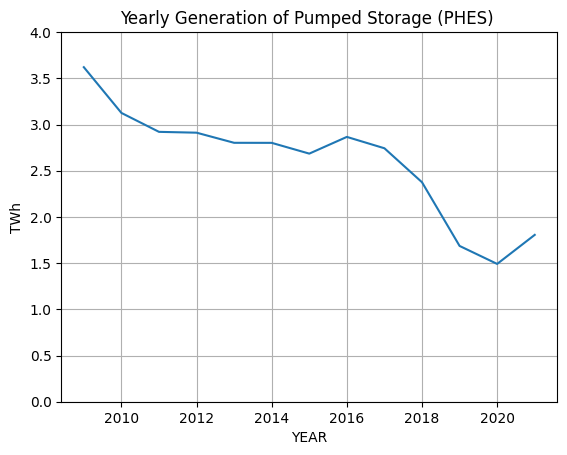

In [ ]:
# convert yearly MW data to TWh for power types

df_yearly['ENERGY_ELEXM_PHES_TWh'] = (df_yearly['POWER_ELEXM_PS_MW']*0.5)/1000000
df_yearly['ENERGY_NGEM_SOLAR_TWh'] = (df_yearly['POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_WIND_TWh'] = ((df_yearly['POWER_ELEXM_WIND_MW']+(df_yearly['POWER_NGEM_EMBEDDED_WIND_GENERATION_MW']))*0.5)/1000000
df_yearly['ENERGY_ELEXM_COAL_TWh'] = (df_yearly['POWER_ELEXM_COAL_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_OIL_TWh'] = (df_yearly['POWER_ELEXM_OIL_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_CCGT_TWh'] = (df_yearly['POWER_ELEXM_CCGT_MW']*0.5)/1000000
df_yearly['ENERGY_ELEXM_NUCLEAR_TWh'] = (df_yearly['POWER_ELEXM_NUCLEAR_MW']*0.5)/1000000
df_yearly.head()

plt.plot(df_yearly['ENERGY_ELEXM_PHES_TWh'])
plt.xlabel('YEAR')
plt.ylabel('TWh')
plt.title('Yearly Generation of Pumped Storage (PHES) ')
plt.ylim([0, 4])
plt.grid()
plt.show

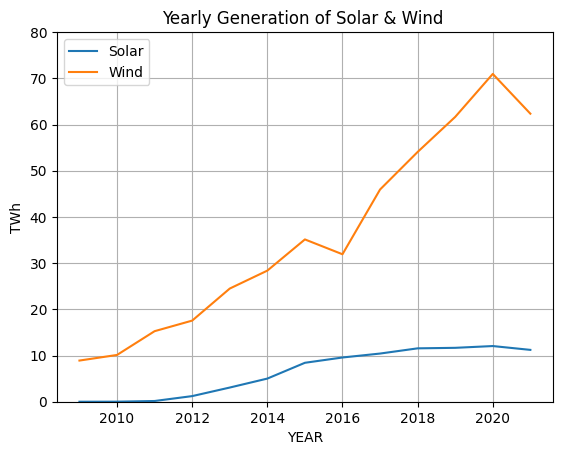

In [ ]:
# plot yearly TWh data for WIND & SOLAR generation

plt.plot(df_yearly['ENERGY_NGEM_SOLAR_TWh'])
plt.plot(df_yearly['ENERGY_ELEXM_WIND_TWh'])
plt.xlabel('YEAR')
plt.ylabel('TWh')
plt.ylim([0, 80])
plt.title('Yearly Generation of Solar & Wind ')
plt.grid()
plt.legend(['Solar', 'Wind'])
plt.show()



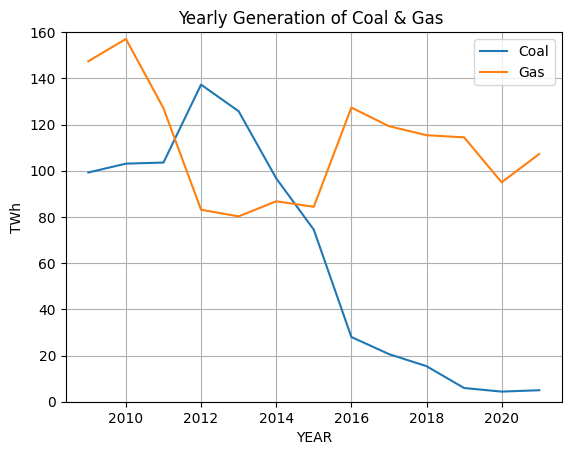

In [ ]:
# plot yearly TWh data for COAL & GAS generation:

plt.plot(df_yearly['ENERGY_ELEXM_COAL_TWh'])
plt.plot(df_yearly['ENERGY_ELEXM_CCGT_TWh'])
plt.xlabel('YEAR')
plt.ylabel('TWh')
plt.ylim([0, 160])
plt.title('Yearly Generation of Coal & Gas ')
plt.grid()
plt.legend(['Coal', 'Gas'])
plt.show()



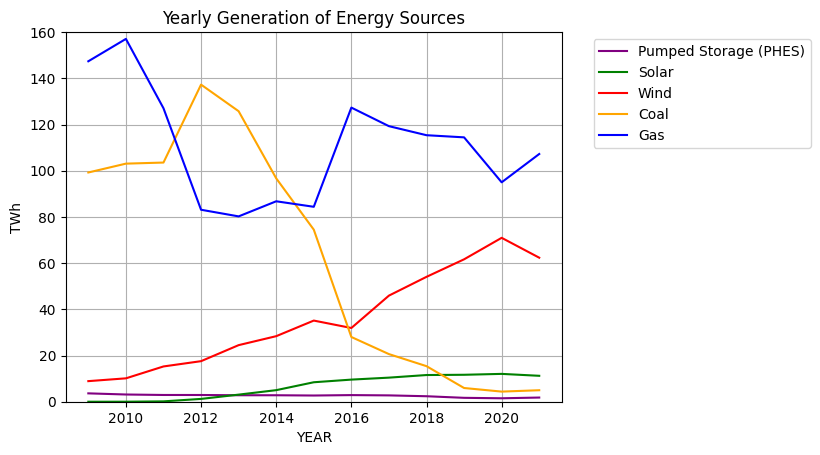

In [ ]:
# Plot all three graphs on the same plot
plt.plot(df_yearly['ENERGY_ELEXM_PHES_TWh'], label='Pumped Storage (PHES)',color='Purple')
plt.plot(df_yearly['ENERGY_NGEM_SOLAR_TWh'], label='Solar',color='Green')
plt.plot(df_yearly['ENERGY_ELEXM_WIND_TWh'], label='Wind',color='Red')
plt.plot(df_yearly['ENERGY_ELEXM_COAL_TWh'], label='Coal',color='Orange')
plt.plot(df_yearly['ENERGY_ELEXM_CCGT_TWh'], label='Gas',color='Blue')
plt.xlabel('YEAR')
plt.ylabel('TWh')
plt.ylim([0, 160])
plt.title('Yearly Generation of Energy Sources')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
